Exercise 3 (p.414, Chap.10), 4 (p.414, Chap.10), 8 (p.416, Chap.10), 9 (p.416, Chap.10) and 10 (p.417,
Chap.10)


# In this problem, you will perform K-means clustering manually, with
K = 2, on a small example with n = 6 observations and p = 2
features. The observations are as follows.
Obs. X1 X2
1 1 4
2 1 3
3 0 4
4 5 1
5 6 2
6 4 0


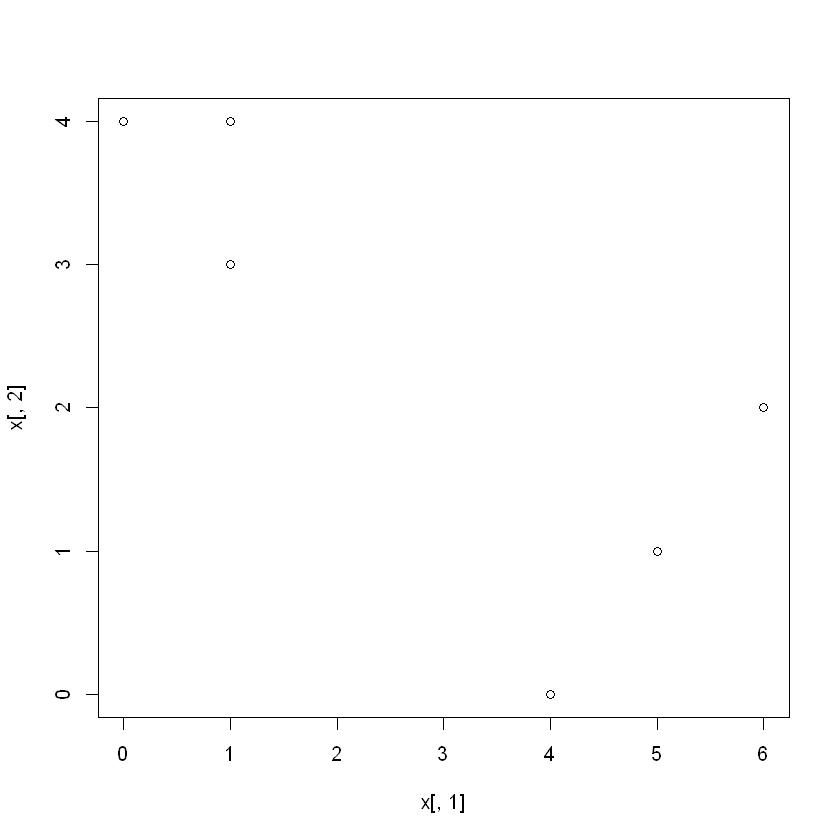

In [34]:
# (a) Plot the observations.
x <- cbind(c(1, 1, 0, 5, 6, 4), c(4, 3, 4, 1, 2, 0))
# dev.new(width = 15,height = 3)
plot(x[,1], x[,2])

[1] 1 2 1 1 2 1

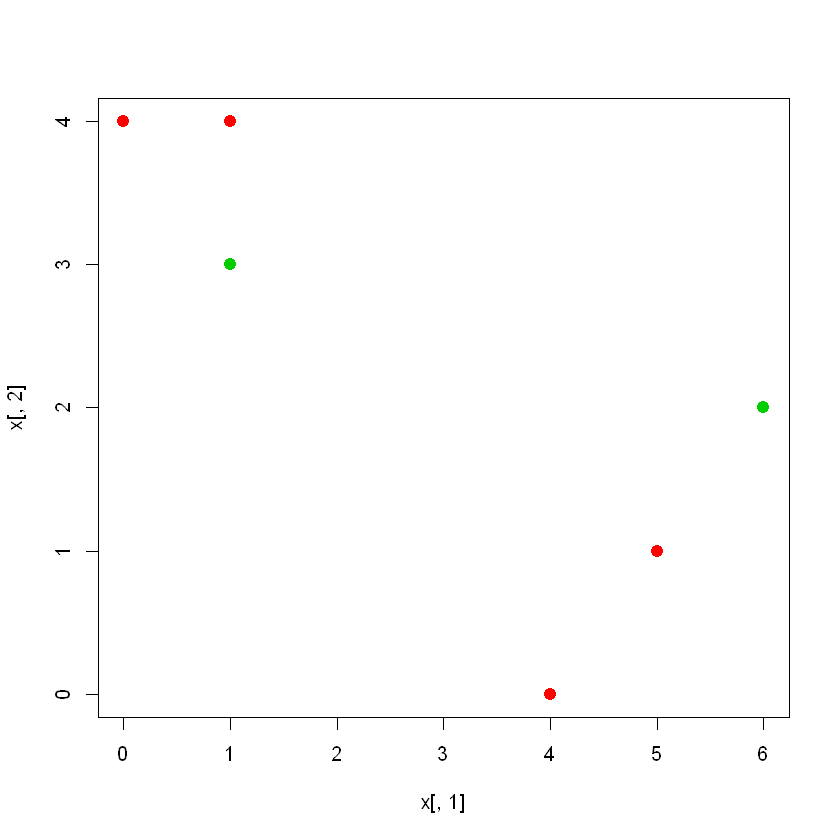

In [38]:
# (b) Randomly assign a cluster label to each observation. You can use the sample() command in R to do this. 
# Report the cluster labels for each observation.
set.seed(1)
labels <- sample(2, nrow(x), replace = T)
labels
plot(x[, 1], x[, 2], col = (labels + 1), pch = 20, cex = 2)

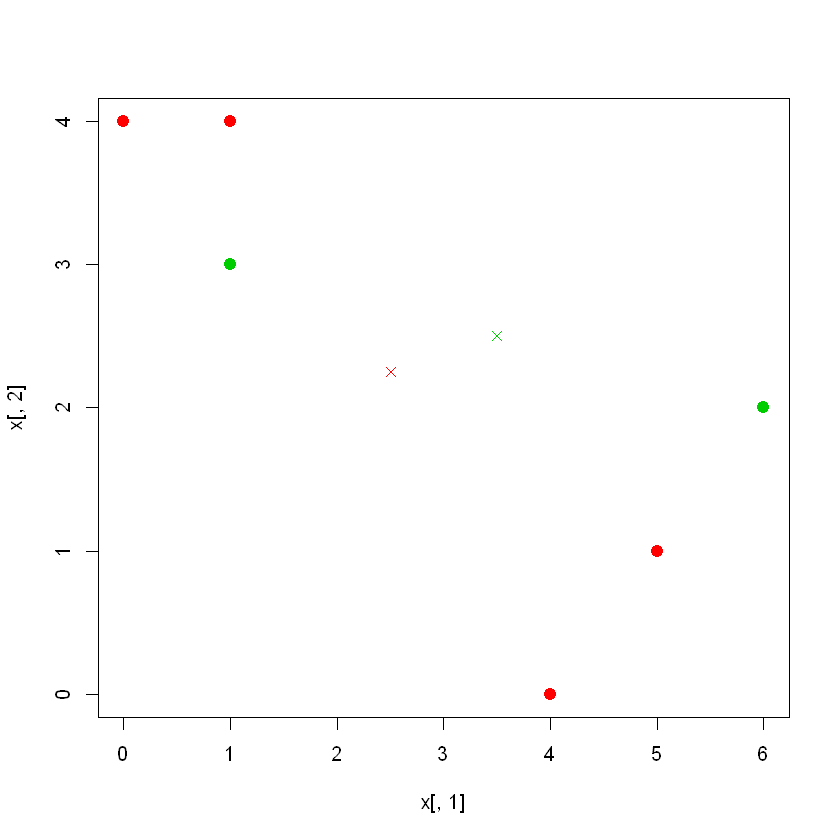

In [39]:
# (c) Compute the centroid for each cluster.
centroid1 <- c(mean(x[labels == 1, 1]), mean(x[labels == 1, 2]))
centroid2 <- c(mean(x[labels == 2, 1]), mean(x[labels == 2, 2]))
plot(x[,1], x[,2], col=(labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

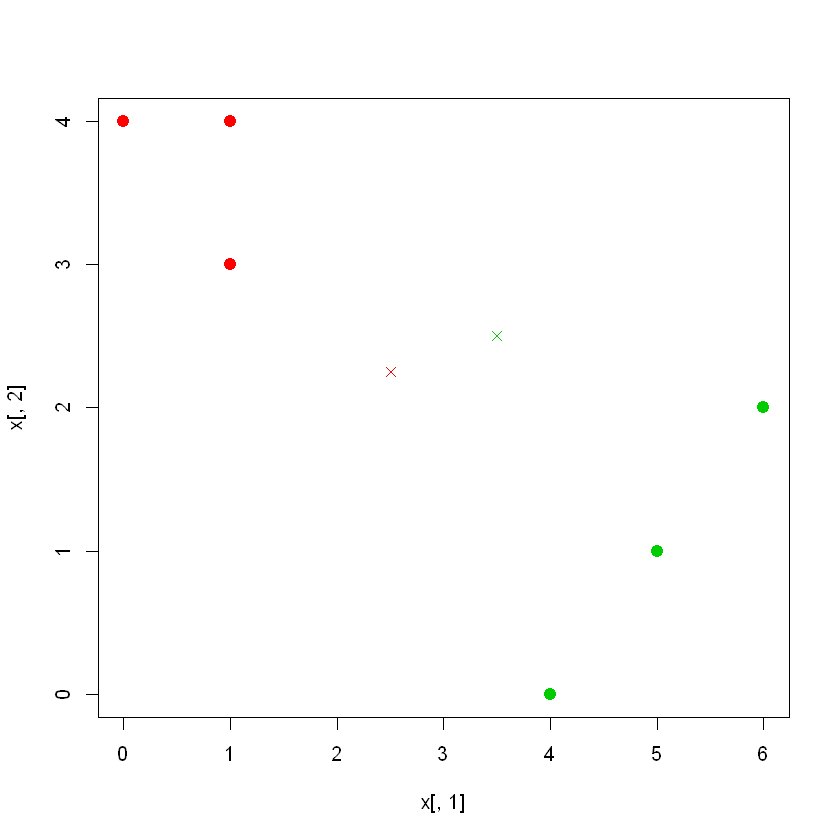

In [40]:
# (d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. 
# Report the cluster labels for each observation.
labels <- c(1, 1, 1, 2, 2, 2)
plot(x[, 1], x[, 2], col = (labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

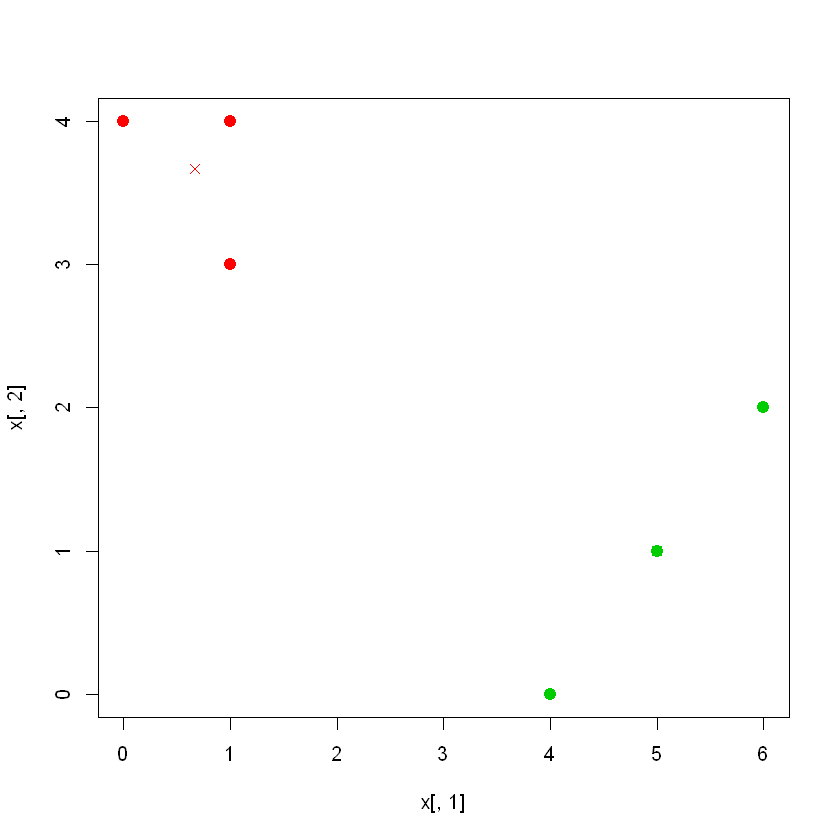

In [32]:
# (e) Repeat (c) and (d) until the answers obtained stop changing.
centroid1 <- c(mean(x[labels == 1, 1]), mean(x[labels == 1, 2]))
centroid2 <- c(mean(x[labels == 2, 1]), mean(x[labels == 2, 2]))
plot(x[,1], x[,2], col=(labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

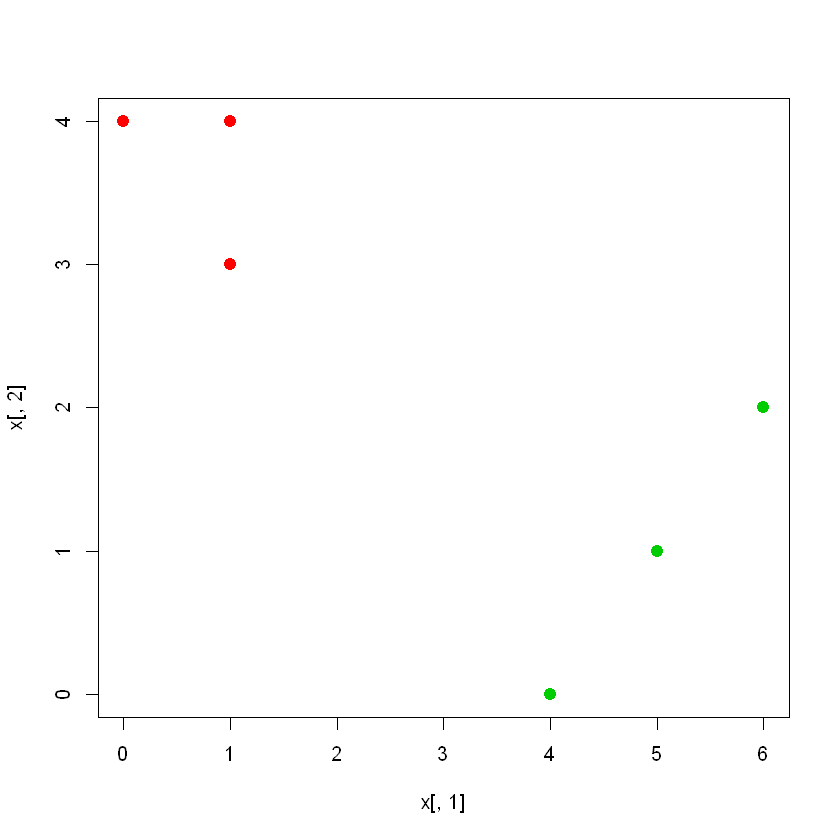

In [33]:
# (f) In your plot from (a), color the observations according to the cluster labels obtained.
plot(x[, 1], x[, 2], col=(labels + 1), pch = 20, cex = 2)

In [42]:
# 4 (p.414, Chap.10)
# Suppose that for a particular data set, we perform hierarchical clustering using single linkage and using complete linkage. We obtain two
# dendrograms.

a. 
There is insufficient information. For example, if d(1,4)=2, d(1,5)=3, d(2,4)=1, d(2,5)=3, d(3,4)=4, and d(3,5)=1, the single linkage dissimilarity between 1,2,3 and 4,5 is 1 and the total linkage dissimilarity between 1,2,3 and 4,5 is 4. As a result, with a single linkage, they would fuse at a height of one, and with a complete linkage, they would fuse at a height of four. However, if all inter-observational distances are equal to 2, the single and complete linkage dissimilarities between 1,2,3 and 4,5 are equal to 2.

b. 
They'd join at the same height. For instance, if d(5,6)=2, the single and total linkage dissimilarities between 5 and 6 are equal to 2. As a result, they would fuse at a height of 2 to form a single and complete linkage.

In [46]:
# 8 (p.416, Chap.10)
# Section 10.2.3, a formula for calculating PVE was given in Equation 10.8. We also saw that the PVE can be obtained 
# using the sdev
# output of the prcomp() function.
# On the USArrests data, calculate PVE in two ways:

In [47]:
# (a) Using the sdev output of the prcomp() function, as was done in Section 10.2.3.

In [49]:
pr.out <- prcomp(USArrests, scale = TRUE)
pr.var <- pr.out$sdev^2
pve <- pr.var / sum(pr.var)
sum(pr.var)
pve

[1] 4

[1] 0.62006039 0.24744129 0.08914080 0.04335752

In [52]:
?prcomp

In [53]:
# (b) By applying Equation 10.8 directly. That is, use the prcomp()
# function to compute the principal component loadings. Then,
# use those loadings in Equation 10.8 to obtain the PVE

In [54]:
loadings <- pr.out$rotation
USArrests2 <- scale(USArrests)
sumvar <- sum(apply(as.matrix(USArrests2)^2, 2, sum))
apply((as.matrix(USArrests2) %*% loadings)^2, 2, sum) / sumvar

PC1        PC2        PC3        PC4 
0.62006039 0.24744129 0.08914080 0.04335752

In [44]:
# 9 (p.416, Chap.10) 

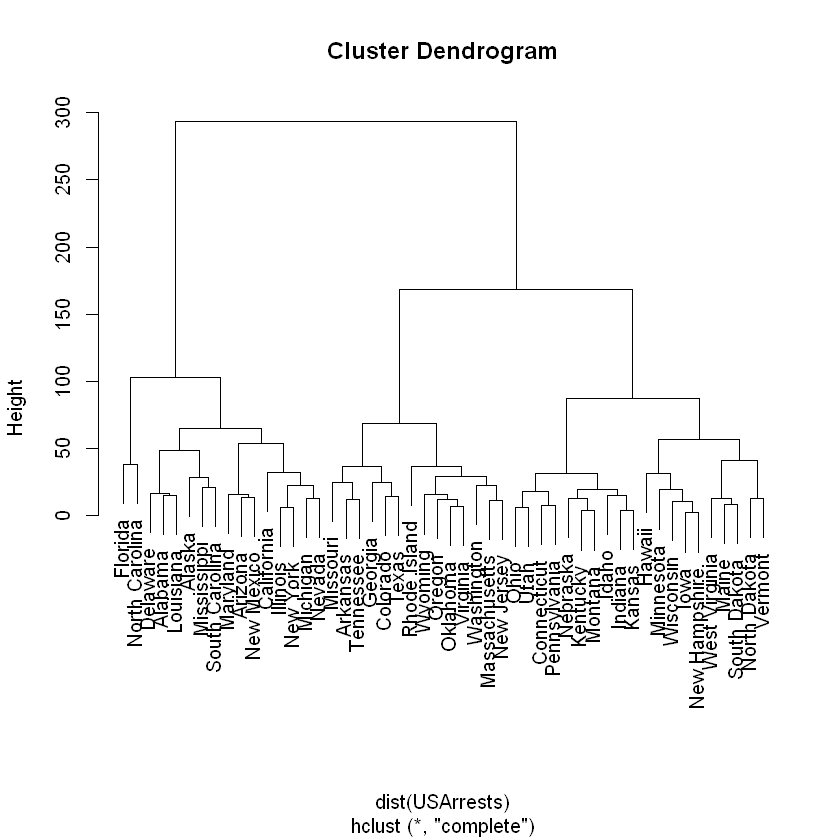

In [57]:
# a) Using hierarchical clustering with complete linkage and
# Euclidean distance, cluster the states
set.seed(1)
hc.complete <- hclust(dist(USArrests), method = "complete")
plot(hc.complete)

In [61]:
# (b) Cut the dendrogram at a height that results in three distinct
# clusters. Which states belong to which clusters?
cutree(hc.complete, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

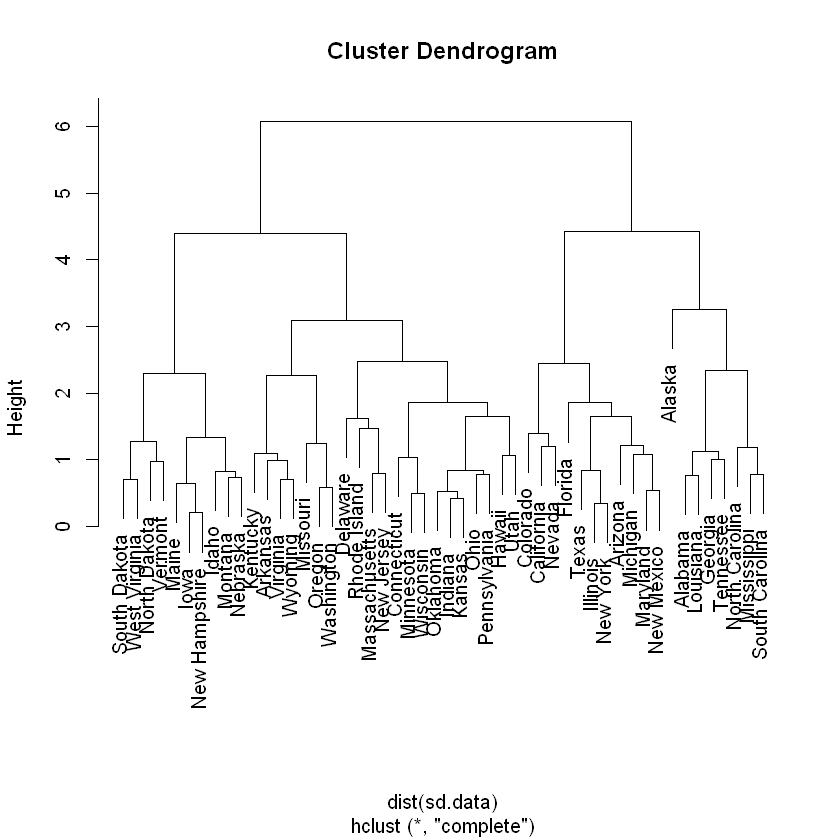

In [62]:
# (c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.
sd.data <- scale(USArrests)
hc.complete.sd <- hclust(dist(sd.data), method = "complete")
plot(hc.complete.sd)

In [64]:
# (d) What effect does scaling the variables have on the hierarchical
# clustering obtained? In your opinion, should the variables be
# scaled before the inter-observation dissimilarities are computed?
# Provide a justification for your answer
cutree(hc.complete.sd, 3)
table(cutree(hc.complete, 3), cutree(hc.complete.sd, 3))

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

   
     1  2  3
  1  6  9  1
  2  2  2 10
  3  0  0 20

In [66]:
# 10 (p.417, Chap.10)
# (a) Generate a simulated data set with 20 observations in each of
# three classes (i.e. 60 observations total), and 50 variables.
# Hint: There are a number of functions in R that you can use to
# generate data. One example is the rnorm() function; runif() is
# another option. Be sure to add a mean shift to the observations
# in each class so that there are three distinct classes.

set.seed(1)
x <- matrix(rnorm(20 * 3 * 50, mean = 0, sd = 0.001), ncol = 50)
x[1:20, 2] <- 1
x[21:40, 1] <- 2
x[21:40, 2] <- 2
x[41:60, 1] <- 1
true.labels <- c(rep(1, 20), rep(2, 20), rep(3, 20))


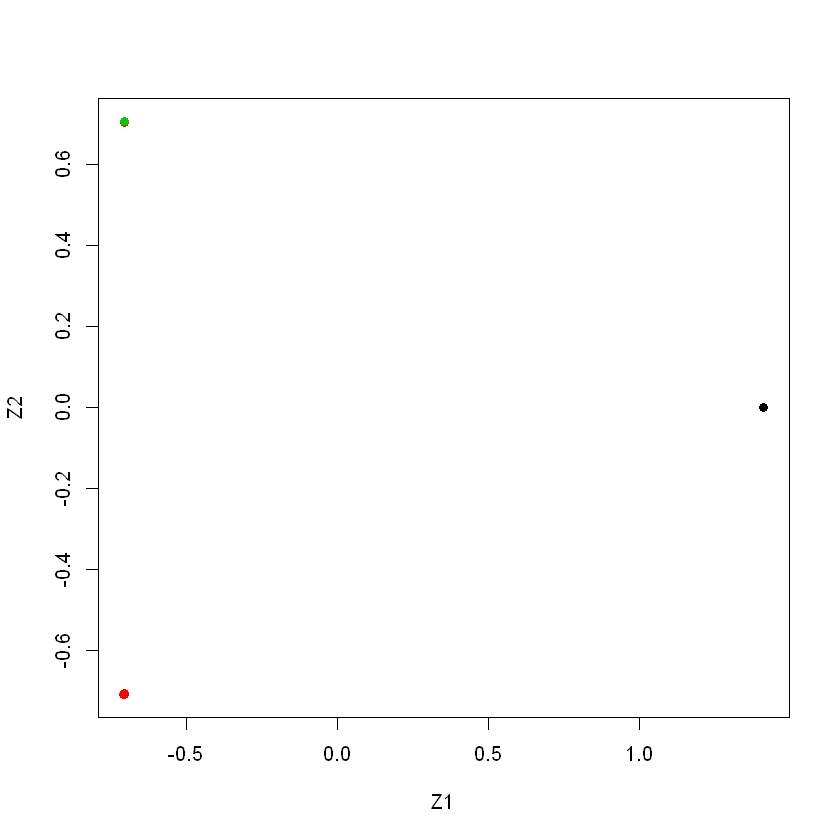

In [67]:
# (b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate
# the observations in each of the three classes. If the three classes
# appear separated in this plot, then continue on to part (c). If
# not, then return to part (a) and modify the simulation so that
# there is greater separation between the three classes. Do not
# continue to part (c) until the three classes show at least som
pr.out <- prcomp(x)
plot(pr.out$x[, 1:2], col = 1:3, xlab = "Z1", ylab = "Z2", pch = 19)

In [68]:
# (c) Perform K-means clustering of the observations with K = 3.
# How well do the clusters that you obtained in K-means clustering compare to the true class labels?
# Hint: You can use the table() function in R to compare the true
# class labels to the class labels obtained by clustering. Be careful
# how you interpret the results: K-means clustering will arbitrarily
# number the clusters, so you cannot simply check whether the true
# class labels and clustering labels are the same

km.out <- kmeans(x, 3, nstart = 20)
table(true.labels, km.out$cluster)

           
true.labels  1  2  3
          1  0  0 20
          2 20  0  0
          3  0 20  0

In [69]:
# d) Perform K-means clustering with K = 2. Describe your results.
km.out <- kmeans(x, 2, nstart = 20)
table(true.labels, km.out$cluster)

           
true.labels  1  2
          1 20  0
          2  0 20
          3 20  0

In [70]:
# (e) Now perform K-means clustering with K = 4, and describe your
# results
km.out <- kmeans(x, 4, nstart = 20)
table(true.labels, km.out$cluster)

           
true.labels  1  2  3  4
          1  0 10 10  0
          2 20  0  0  0
          3  0  0  0 20

In [71]:
# (f) Now perform K-means clustering with K = 3 on the first two
# principal component score vectors, rather than on the raw data.
# That is, perform K-means clustering on the 60 × 2 matrix of
# which the first column is the first principal component score
# vector, and the second column is the second principal component
# score vector. Comment on the results.
# (g) Using the scale() function, perform K

km.out <- kmeans(pr.out$x[, 1:2], 3, nstart = 20)
table(true.labels, km.out$cluster)

           
true.labels  1  2  3
          1  0 20  0
          2 20  0  0
          3  0  0 20

In [72]:
# (g) Using the scale() function, perform K-means clustering with
# K = 3 on the data after scaling each variable to have standard
# deviation one. How do these results compare to those obtained
# in (b)? Explain

km.out <- kmeans(scale(x), 3, nstart = 20)
table(true.labels, km.out$cluster)

           
true.labels  1  2  3
          1  0 14  6
          2 16  0  4
          3  1  9 10